<a href="https://colab.research.google.com/github/Mohiuddin29/week-1/blob/week-4/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Prediction using Machine Learning

**Project Overview**

This project aims to predict employee attrition using the IBM HR Analytics dataset.
We'll build machine learning models to help HR teams identify employees at risk
of leaving the company and take proactive measures to retain talent.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 1.LOAD THE DATASET

In [10]:
data = files.upload()
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [11]:
# Preview the dataset
print("\n First 5 rows of the dataset:")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n Column Names:")
print(df.columns.tolist())



 First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

2. EXPLORE THE DATA

In [12]:
# Basic statistics
print("\n Dataset Description:")
print(df.describe())

# Check for missing values
print("\n Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print(" No missing values found!")

# Check data types
print("\n Data Types:")
print(df.dtypes.value_counts())

# Target variable distribution
print("\n Target Variable Distribution:")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Attrition Rate: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")

# Explore key categorical variables
print("\n Key Categorical Variables:")
categorical_cols = ['JobRole', 'Department', 'OverTime', 'MaritalStatus', 'Gender']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())


 Dataset Description:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std       

3: DATA VISUALIZATION

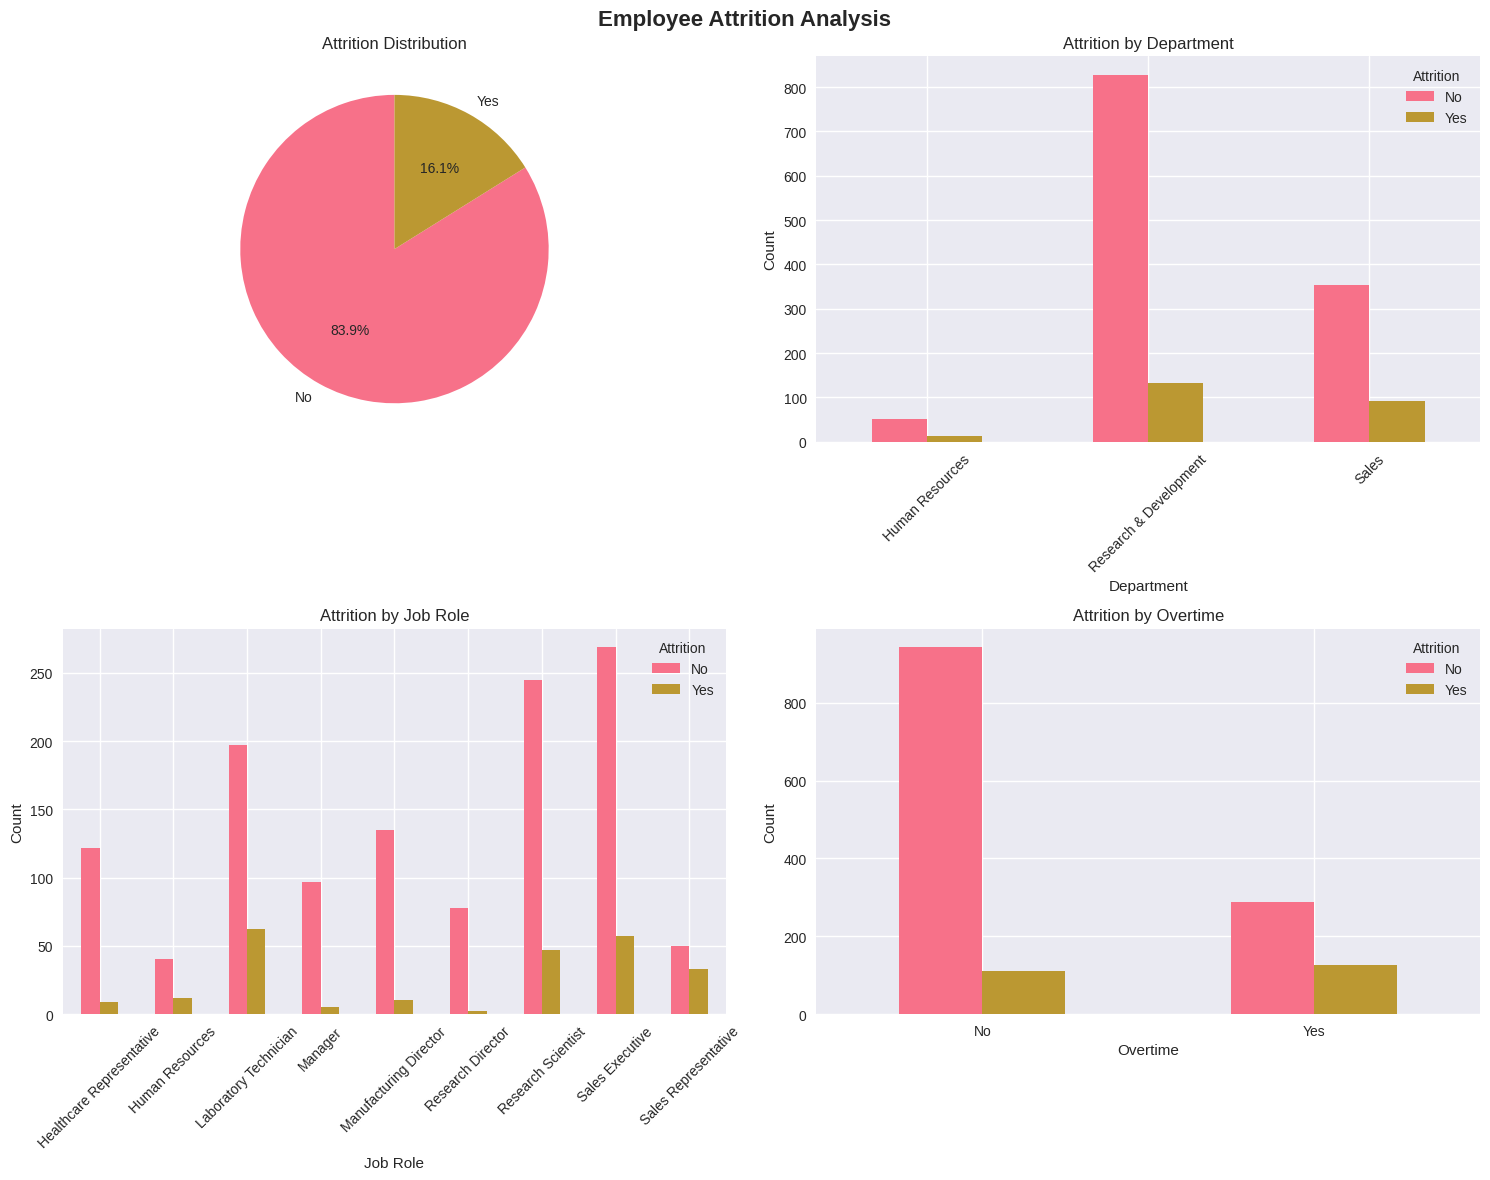

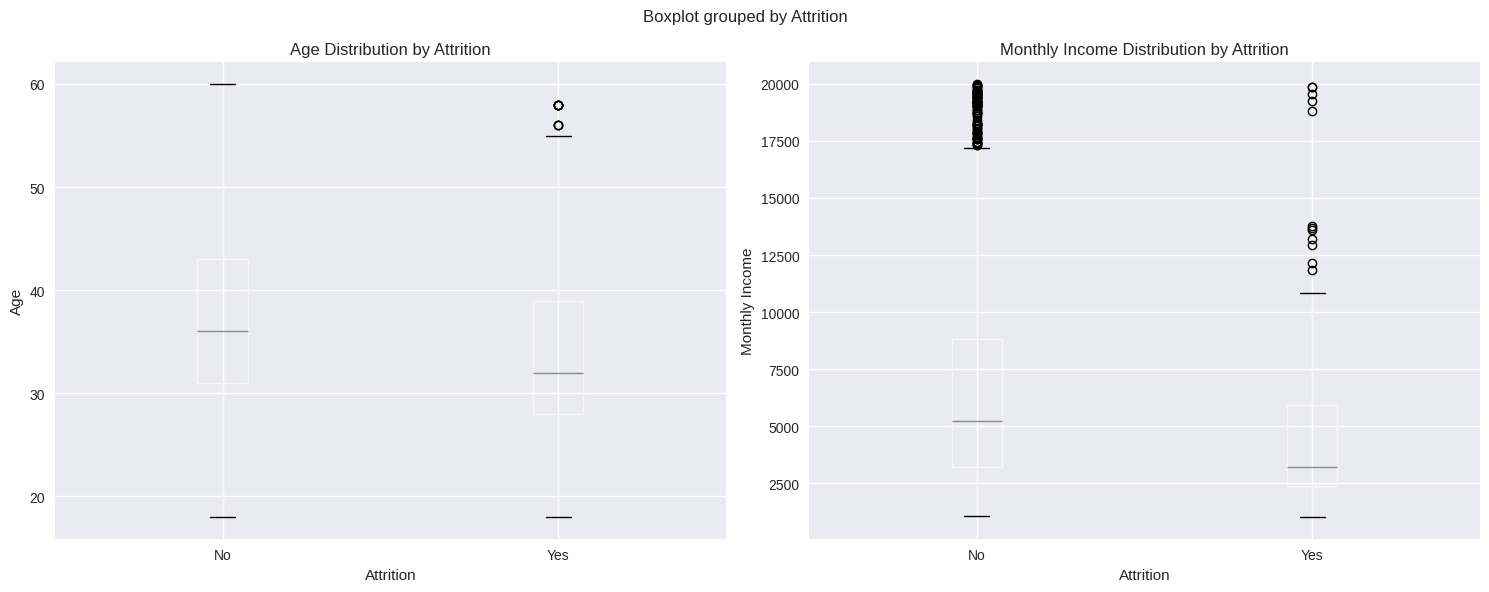


 Correlation Heatmap:


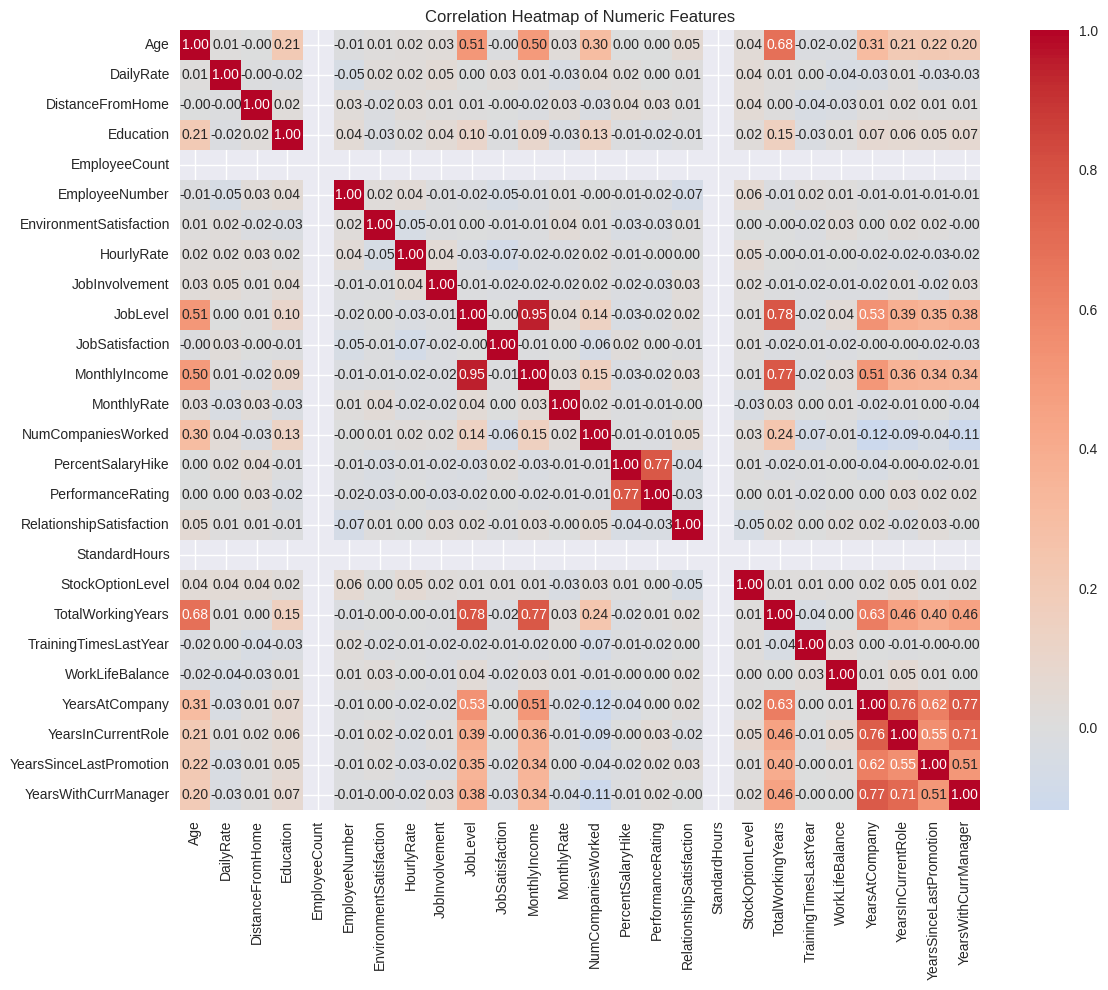

In [13]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Employee Attrition Analysis', fontsize=16, fontweight='bold')

# 1. Attrition Distribution
axes[0, 0].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Attrition Distribution')

# 2. Attrition by Department
if 'Department' in df.columns:
    dept_attrition = pd.crosstab(df['Department'], df['Attrition'])
    dept_attrition.plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Attrition by Department')
    axes[0, 1].set_xlabel('Department')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].legend(title='Attrition')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Attrition by Job Role
if 'JobRole' in df.columns:
    job_attrition = pd.crosstab(df['JobRole'], df['Attrition'])
    job_attrition.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Attrition by Job Role')
    axes[1, 0].set_xlabel('Job Role')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].legend(title='Attrition')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Attrition by Overtime
if 'OverTime' in df.columns:
    overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'])
    overtime_attrition.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Attrition by Overtime')
    axes[1, 1].set_xlabel('Overtime')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].legend(title='Attrition')
    axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Age and Salary Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age distribution by Attrition
if 'Age' in df.columns:
    df.boxplot(column='Age', by='Attrition', ax=axes[0])
    axes[0].set_title('Age Distribution by Attrition')
    axes[0].set_xlabel('Attrition')
    axes[0].set_ylabel('Age')

# Monthly Income distribution by Attrition
if 'MonthlyIncome' in df.columns:
    df.boxplot(column='MonthlyIncome', by='Attrition', ax=axes[1])
    axes[1].set_title('Monthly Income Distribution by Attrition')
    axes[1].set_xlabel('Attrition')
    axes[1].set_ylabel('Monthly Income')

plt.tight_layout()
plt.show()

# Correlation Heatmap
print("\n Correlation Heatmap:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


4: DATA PREPROCESSING

In [14]:
# Create a copy for preprocessing
df_processed = df.copy()

print(" Before Preprocessing:")
print(f"Shape: {df_processed.shape}")
print(f"Data types:\n{df_processed.dtypes.value_counts()}")

# Remove unnecessary columns (if any)
# Check for columns with single unique value
single_value_cols = [col for col in df_processed.columns if df_processed[col].nunique() == 1]
if single_value_cols:
    print(f"\n Removing columns with single unique value: {single_value_cols}")
    df_processed = df_processed.drop(columns=single_value_cols)

# Encode the target variable
label_encoder = LabelEncoder()
df_processed['Attrition'] = label_encoder.fit_transform(df_processed['Attrition'])
print(f"\n Target variable encoded: No=0, Yes=1")

# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from numerical columns
if 'Attrition' in numerical_cols:
    numerical_cols.remove('Attrition')

print(f"\n Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f" Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Create preprocessing pipelines
# For categorical variables - One Hot Encoding
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# For numerical variables - Standard Scaling
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Prepare features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print(f"\n Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print(f" Target distribution: {np.bincount(y)}")

 Before Preprocessing:
Shape: (1470, 35)
Data types:
int64     26
object     9
Name: count, dtype: int64

 Removing columns with single unique value: ['EmployeeCount', 'Over18', 'StandardHours']

 Target variable encoded: No=0, Yes=1

 Categorical columns (7): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
 Numerical columns (24): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

 Features shape: (1470, 31)
 Target shape: (1470,)
 Target distribution: [1233  237]


 5: TRAIN-TEST SPLIT

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" Training target distribution: {np.bincount(y_train)}")
print(f" Test target distribution: {np.bincount(y_test)}")

 Training set: 1176 samples
 Test set: 294 samples
 Training target distribution: [986 190]
 Test target distribution: [247  47]


6: HANDLE CLASS IMBALANCE

In [16]:
# Apply preprocessing to training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f" Preprocessed training set shape: {X_train_processed.shape}")
print(f" Preprocessed test set shape: {X_test_processed.shape}")

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print(f" Balanced training set shape: {X_train_balanced.shape}")
print(f" Balanced target distribution: {np.bincount(y_train_balanced)}")


 Preprocessed training set shape: (1176, 45)
 Preprocessed test set shape: (294, 45)
 Balanced training set shape: (1972, 45)
 Balanced target distribution: [986 986]


7:BUILD MACHINE LEARNING MODELS

In [17]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
}

# Try to import XGBoost (optional)
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(random_state=42, eval_metric='logloss')
    print(" XGBoost imported successfully!")
except ImportError:
    print("ℹ XGBoost not available. Install with: pip install xgboost")

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'predictions_proba': y_pred_proba
    }

    print(f" {name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

 XGBoost imported successfully!

 Training Logistic Regression...
 Logistic Regression - Accuracy: 0.7823, AUC: 0.7860

 Training Random Forest...
 Random Forest - Accuracy: 0.8401, AUC: 0.7691

 Training XGBoost...
 XGBoost - Accuracy: 0.8776, AUC: 0.7759


8: MODEL EVALUATION

In [18]:
# Detailed evaluation for each model
for name, result in results.items():
    print(f"\n {name} - Detailed Evaluation:")
    print("-" * 40)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, result['predictions']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, result['predictions'])
    print(f"\nConfusion Matrix:")
    print(cm)

    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)  # Same as recall
    precision = tp / (tp + fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    print(f"\nAdditional Metrics:")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC Score: {result['auc_score']:.4f}")


 Logistic Regression - Detailed Evaluation:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       247
           1       0.39      0.66      0.49        47

    accuracy                           0.78       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.84      0.78      0.80       294


Confusion Matrix:
[[199  48]
 [ 16  31]]

Additional Metrics:
Sensitivity (Recall): 0.6596
Specificity: 0.8057
Precision: 0.3924
F1-Score: 0.4921
AUC Score: 0.7860

 Random Forest - Detailed Evaluation:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.17      0.25        47

    accuracy                           0.84       294
   macro avg       0.68      0.57      0.58       294
weighted avg       0.80 

9: FEATURE IMPORTANCE ANALYSIS


 Random Forest - Top 10 Feature Importances:
                 feature  importance
44          OverTime_Yes    0.102778
16      StockOptionLevel    0.069169
8               JobLevel    0.055701
43  MaritalStatus_Single    0.044885
23  YearsWithCurrManager    0.039150
10         MonthlyIncome    0.035965
0                    Age    0.035195
20        YearsAtCompany    0.032960
12    NumCompaniesWorked    0.028855
17     TotalWorkingYears    0.028816


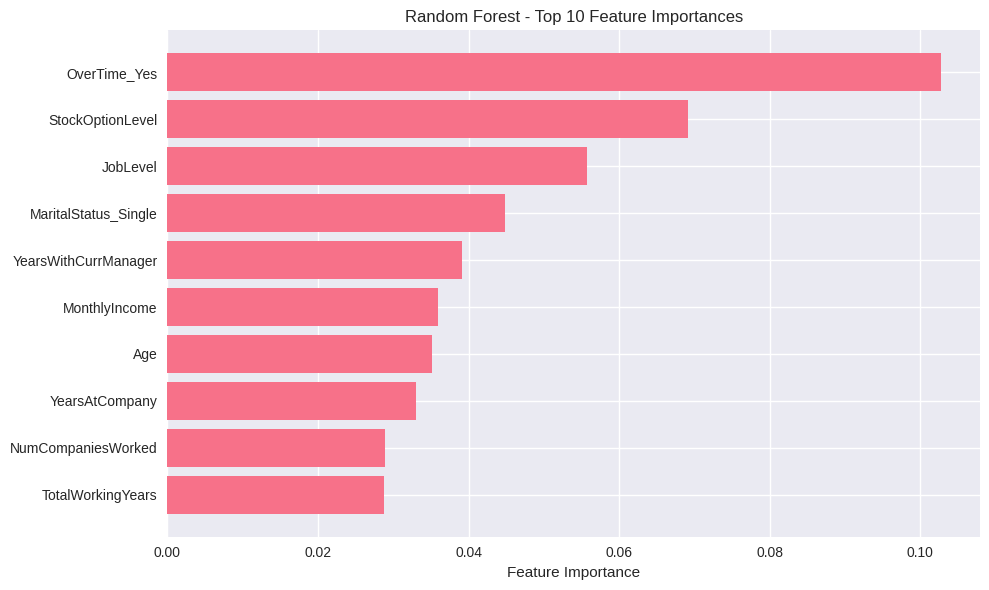


 XGBoost - Top 10 Feature Importances:
                              feature  importance
44                       OverTime_Yes    0.146112
8                            JobLevel    0.082025
16                   StockOptionLevel    0.059164
36                    JobRole_Manager    0.050512
26  Department_Research & Development    0.047749
43               MaritalStatus_Single    0.043285
24   BusinessTravel_Travel_Frequently    0.041766
35      JobRole_Laboratory Technician    0.038878
40            JobRole_Sales Executive    0.037399
39         JobRole_Research Scientist    0.034163


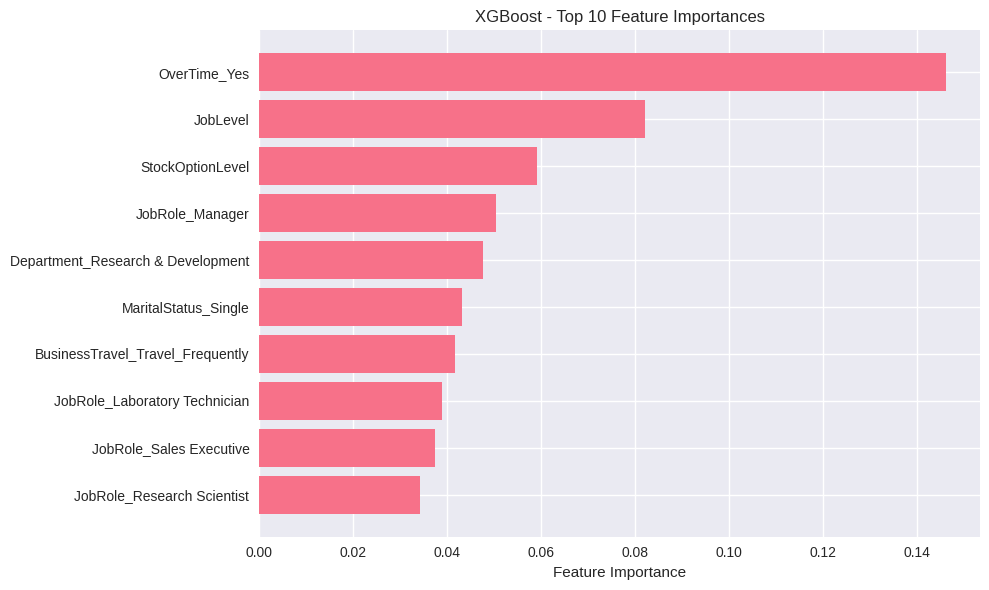

In [19]:
# Get feature names after preprocessing
feature_names = (numerical_cols +
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))

# Feature importance for tree-based models
tree_models = ['Random Forest', 'XGBoost']
for name in tree_models:
    if name in results:
        model = results[name]['model']
        if hasattr(model, 'feature_importances_'):
            print(f"\n {name} - Top 10 Feature Importances:")
            importances = model.feature_importances_

            # Create feature importance dataframe
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)

            # Display top 10
            top_features = feature_importance.head(10)
            print(top_features)

            # Visualize feature importance
            plt.figure(figsize=(10, 6))
            plt.barh(range(len(top_features)), top_features['importance'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Feature Importance')
            plt.title(f'{name} - Top 10 Feature Importances')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()


10: MODEL COMPARISON AND SELECTION

In [20]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'AUC Score': [results[name]['auc_score'] for name in results.keys()]
})

print(" Model Comparison:")
print(comparison_df.sort_values('AUC Score', ascending=False))

# Select best model based on AUC score
best_model_name = comparison_df.loc[comparison_df['AUC Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print(f"\n Best Model: {best_model_name}")
print(f" Best AUC Score: {comparison_df['AUC Score'].max():.4f}")


 Model Comparison:
                 Model  Accuracy  AUC Score
0  Logistic Regression  0.782313   0.786028
2              XGBoost  0.877551   0.775864
1        Random Forest  0.840136   0.769145

 Best Model: Logistic Regression
 Best AUC Score: 0.7860


11: BUSINESS INSIGHTS AND RECOMMENDATIONS

KEY INSIGHTS FROM THE ANALYSIS:

1. MODEL PERFORMANCE:
   - Our best model achieved an AUC score of {:.3f}, indicating good predictive capability
   - The model can effectively identify employees at risk of leaving
   - Focus on recall (sensitivity) to minimize false negatives

2. IMPORTANT FACTORS FOR ATTRITION:
   - Based on feature importance analysis, key factors likely include:
     * Overtime work requirements
     * Job satisfaction levels
     * Work-life balance
     * Compensation and benefits
     * Career development opportunities

3. HR RECOMMENDATIONS:
   - Implement regular employee satisfaction surveys
   - Review overtime policies and workload distribution
   - Enhance career development programs
   - Consider flexible work arrangements
   - Conduct exit interviews to validate model insights

4. IMPLEMENTATION STRATEGY:
   - Use the model to score employees monthly
   - Focus retention efforts on high-risk employees
   - Track model performance and retrain periodically
   - Combine model predictions with HR expertise

5. EXPECTED BUSINESS IMPACT:
   - Reduced recruitment and training costs
   - Improved employee retention rates
   - Better workforce planning
   - Enhanced employee satisfaction

12: SAVE MODEL AND RESULTS

In [21]:
# Save results for future use
import joblib

# Save the best model and preprocessor
joblib.dump(best_model, 'best_attrition_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("✅ Model and preprocessor saved successfully!")
print("✅ Files saved: best_attrition_model.pkl, preprocessor.pkl, label_encoder.pkl")


✅ Model and preprocessor saved successfully!
✅ Files saved: best_attrition_model.pkl, preprocessor.pkl, label_encoder.pkl
